In [2]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# miscellaneous
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# deep learning stack
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10

In [4]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
xtrain = xtrain.reshape(60000, 28, 28,1)
xtest = xtest.reshape(10000, 28, 28,1)

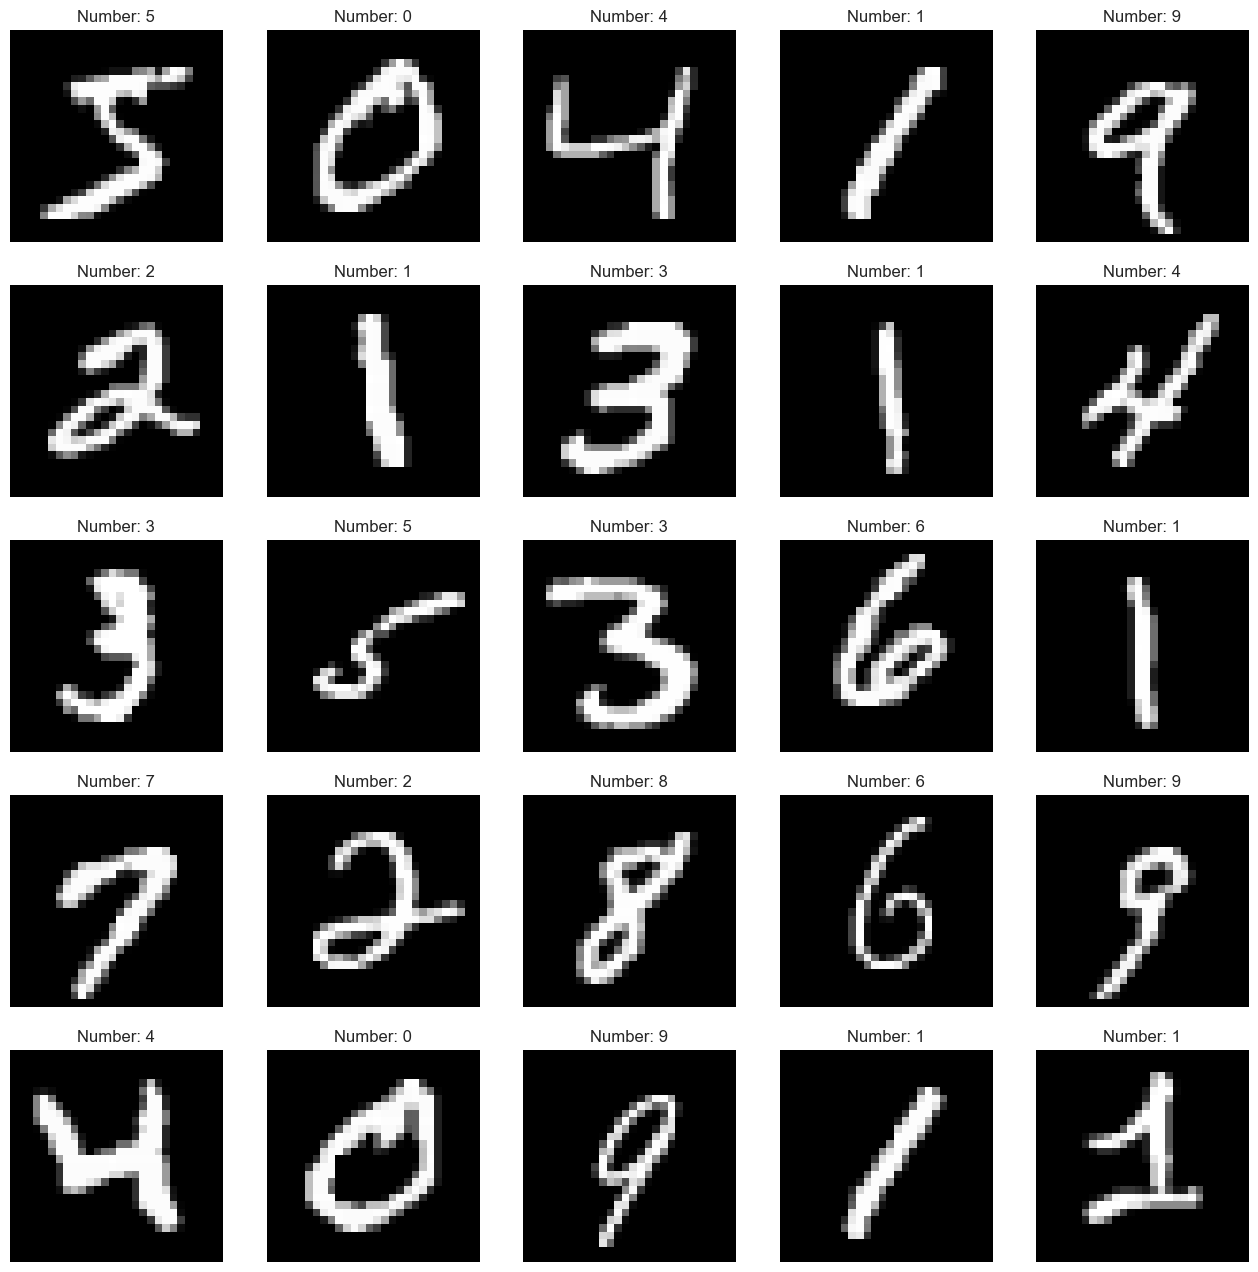

In [7]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i+1,title=f'Number: {ytrain[i]}')
    plt.imshow(xtrain[i],cmap='gray')
    plt.axis('off')

In [8]:
ytrain[2]

4

In [9]:
# flatten the input
xtrain_flatten = xtrain.reshape((60000, 28*28))
xtrain_flatten.shape

(60000, 784)

In [10]:
xtrain_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [18]:
ytrain_cat = tf.keras.utils.to_categorical(ytrain)
ytrain_cat.shape

(60000, 10)

In [13]:
def model_builder():
    '''
    creates a ANN model by stacking dense layers 
    '''
    # initialize the Sequential API to stack the layers
    model = keras.Sequential()
    
    # first hidden layer
    model.add(
        keras.layers.Dense(
            units=25, # better to have something like 2 to power of n. 
            activation='relu',
            input_shape=(28*28, )
        )
    )
        # first hidden layer
    model.add(
        keras.layers.Dense(
            units=25, # better to have something like 2 to power of n. 
            activation='relu'
        )
    )
        # first hidden layer
    model.add(
        keras.layers.Dense(
            units=25, # better to have something like 2 to power of n. 
            activation='relu'
        )
    )
        # first hidden layer
    model.add(
        keras.layers.Dense(
            units=25, # better to have something like 2 to power of n. 
            activation='relu'
        )
    )
    # dropout: randomly set 20% of the previous output to zero
    model.add(
        keras.layers.Dropout(
            rate=0.2
        )
    )
    # output layer with softmax activation function
    model.add(
        keras.layers.Dense(
            units=10,
            activation='softmax'
        )
    )
    # compile model
    model.compile(
        optimizer=keras.optimizers.Adam(),
        loss=keras.losses.categorical_crossentropy,
        metrics=[keras.metrics.categorical_accuracy]
    )

    return model

In [14]:
K.clear_session()
model = model_builder()

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
Total params: 21,835
Trainable params: 21,835
Non-traina

In [19]:
results = model.fit(
    xtrain_flatten,
    ytrain_cat, 
    epochs=100, # number of iterations through the complete dataset            
    batch_size=500, # number of observations used when updating weights, gradient        
    validation_split=0.2, # 20% of the data is used for validation
)

Epoch 1/100
96/96 [==============================] - 2s 9ms/step - loss: 6.3988 - categorical_accuracy: 0.1654 - val_loss: 2.0341 - val_categorical_accuracy: 0.2565
Epoch 2/100
96/96 [==============================] - 1s 8ms/step - loss: 2.0130 - categorical_accuracy: 0.2636 - val_loss: 1.8946 - val_categorical_accuracy: 0.3011
Epoch 3/100
96/96 [==============================] - 1s 8ms/step - loss: 1.8694 - categorical_accuracy: 0.3151 - val_loss: 1.7112 - val_categorical_accuracy: 0.3713
Epoch 4/100
96/96 [==============================] - 1s 7ms/step - loss: 1.6958 - categorical_accuracy: 0.3701 - val_loss: 1.5420 - val_categorical_accuracy: 0.4198
Epoch 5/100
96/96 [==============================] - 1s 6ms/step - loss: 1.5320 - categorical_accuracy: 0.4212 - val_loss: 1.3517 - val_categorical_accuracy: 0.4933
Epoch 6/100
96/96 [==============================] - 1s 7ms/step - loss: 1.3480 - categorical_accuracy: 0.4945 - val_loss: 1.1895 - val_categorical_accuracy: 0.5512
Epoch 7/10